# Student Performance in Exams
- name: 黃振宏
- id: E14046402
- department: 機械系
- data:
    - https://www.kaggle.com/spscientist/students-performance-in-exams#StudentsPerformance.csv

此數據希望了解父母教育程度,是否有準備考試等因素對學生成績的影響

這個資料中的數據有
    1. 性別 (gender)
    2. 種族 (race/ethnicity)
    3. 父母教育程度 (parental level of education)
    4. 午餐類別 (lunch)
    5. 是否有參加考試準備課程 (test preparation course)
    6. 數學成績 (math score)
    7. 聽力成績 (reading score)
    8. 手寫成績 (writing score)

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.tree import export_graphviz
from sklearn.metrics import accuracy_score
from sklearn.externals.six import StringIO
import pydotplus

pd_data = pd.read_csv('./StudentsPerformance.csv')
pd_data.head()

,gender,race/ethnicity,parental level of education,lunch,test preparation course,math score,reading score,writing score
0,female,group B,bachelor's degree,standard,none,72,72,74
1,female,group C,some college,standard,completed,69,90,88
2,female,group B,master's degree,standard,none,90,95,93
3,male,group A,associate's degree,free/reduced,none,47,57,44
4,male,group C,some college,standard,none,76,78,75


# 看分數分佈

In [2]:
pd_data.describe()

,math score,reading score,writing score
count,1000.00000,1000.000000,1000.000000
mean,66.08900,69.169000,68.054000
std,15.16308,14.600192,15.195657
min,0.00000,17.000000,10.000000
25%,57.00000,59.000000,57.750000
50%,66.00000,70.000000,69.000000
75%,77.00000,79.000000,79.000000
max,100.00000,100.000000,100.000000


# 看每個attribute的資料分佈

In [3]:
count_gender = pd_data['gender'].value_counts()
count_race = pd_data['race/ethnicity'].value_counts()
count_education = pd_data['parental level of education'].value_counts()
count_lunch = pd_data['lunch'].value_counts()
count_course = pd_data['test preparation course'].value_counts()

# 性別分佈

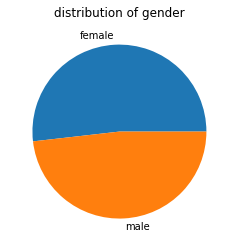

In [4]:
# gender分佈
plt.title('distribution of gender')
plt.pie(count_gender.to_list(), labels=count_gender.index.values.tolist())
plt.show()

# 種族分佈

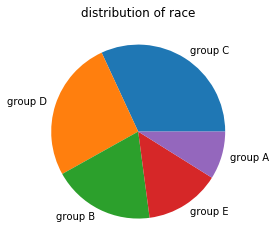

In [5]:
# race分佈
plt.title('distribution of race')
plt.pie(count_race.to_list(), labels=count_race.index.values.tolist())
plt.show()

# 教育分佈

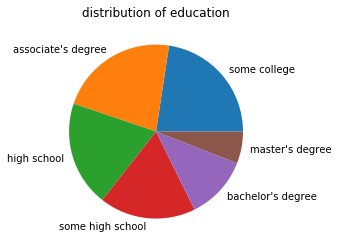

In [6]:
# education分佈
plt.title('distribution of education')
plt.pie(count_education.to_list(), labels=count_education.index.values.tolist())
plt.show()

# 午餐

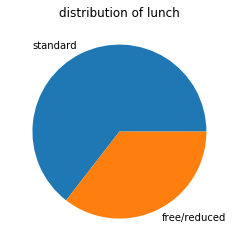

In [7]:
# lunch分佈
plt.title('distribution of lunch')
plt.pie(count_lunch.to_list(), labels=count_lunch.index.values.tolist())
plt.show()

# 是否有上完課程

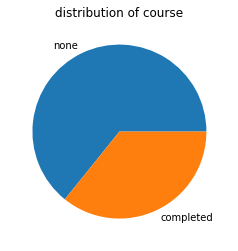

In [8]:
# course分佈
plt.title('distribution of course')
plt.pie(count_course.to_list(), labels=count_course.index.values.tolist())
plt.show()

# 數學分數分佈

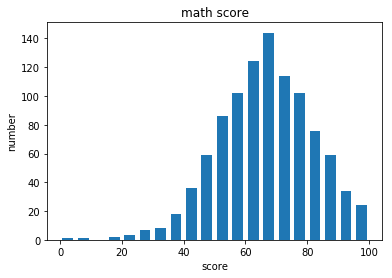

In [9]:
plt.hist(x=pd_data['math score'], bins=20, rwidth=0.7)
plt.title('math score')
plt.xlabel('score')
plt.ylabel('number')
plt.show()

# 閱讀分數分佈

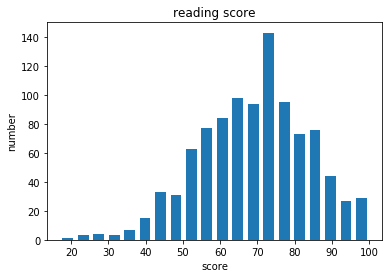

In [10]:
plt.hist(x=pd_data['reading score'], bins=20, rwidth=0.7)
plt.title('reading score')
plt.xlabel('score')
plt.ylabel('number')
plt.show()

# 手寫分數分佈

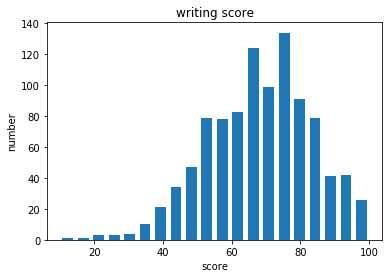

In [11]:
plt.hist(x=pd_data['writing score'], bins=20, rwidth=0.7)
plt.title('writing score')
plt.xlabel('score')
plt.ylabel('number')
plt.show()

# 將資料數值化
- genger
    - female: 0
    - male: 1
    
- race/ethnicity
    - group A: 0
    - group B: 1
    - group C: 2
    - group D: 3
    - group E: 4
    
- parental level of education
    - some high school: 0 (讀high school，但沒有畢業)
    - high school: 1
    - some college: 2 (讀學士，但沒有畢業)
    - associate's degree: 3 (副學士)
    - bachelor's degree: 4 (學士)
    - master's degree: 5
    
- lunch
    - free/reduced: 0
    - standard: 1

- test preparation course
    - none: 0
    - completed: 1

In [12]:
# gender mapping (female: 0, male: 1)
def gender_map(text):
    if text == 'female':
        return 0
    elif text == 'male':
        return 1
    else:
        return -1

# race mapping
def race_map(text):
    if text == 'group A':
        return 0
    elif text == 'group B':
        return 1
    elif text == 'group C':
        return 2
    elif text == 'group D':
        return 3
    elif text == 'group E':
        return 4
    else: 
        return -1 
    
# education mapping
def education_map(text):
    if text == "some high school":
        return 0
    elif text == "high school":
        return 1
    elif text == "some college":
        return 2
    elif text == "associate's degree":
        return 3
    elif text == "bachelor's degree":
        return 4
    elif text == "master's degree":
        return 5
    else:
        return -1

# lunch mapping
def lunch_map(text):
    if text == "free/reduced":
        return 0
    elif text == "standard":
        return 1
    else:
        return -1

# course mapping
def course_map(text):
    if text == 'none':
        return 0
    elif text == 'completed':
        return 1
    else:
        return -1 
    
# data numeralization
num_data = pd_data.drop(['gender', 'race/ethnicity', 'parental level of education', 'lunch', 'test preparation course'], axis=1)
num_data['gender'] = pd_data['gender'].apply(gender_map) 
num_data['race'] = pd_data['race/ethnicity'].apply(race_map) 
num_data['education'] = pd_data['parental level of education'].apply(education_map)
num_data['lunch'] = pd_data['lunch'].apply(lunch_map)
num_data['course'] = pd_data['test preparation course'].apply(course_map)

# Heat Map
1. 從下面分析可以看出，成績之間的相關程度很大，通常其中一個分數高，其他兩個分數也會較高
2. 性別(gender)中女生為0，男生為1，在數學部份為正相關，說明平均來看，男生數學較好，在閱讀和寫作部份，為負相關，平均來看女生閱讀和寫作較好
3. 在父母教育程度(education)，午餐是否補助的(lunch)和是否有參加考試課程(course)中皆為正相關，說明這些事情都會影響學生成績 

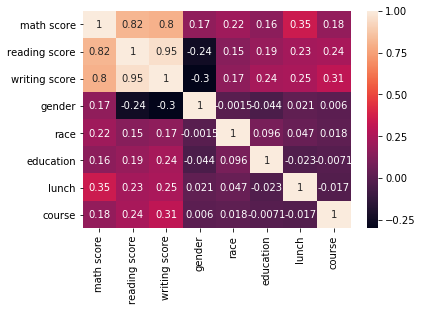

In [13]:
heatMap = sns.heatmap(num_data.corr(), annot=True)

# 種族對成績的影響
因為每個種族人數不一樣，所以除以人數，看每個級距分佈百分比

In [14]:
def score_scope_map(score):
    return int(score / 10) * 10

race_data = num_data.copy()

# 將分數分級巨
race_data['math gap'] = pd_data['math score'].apply(score_scope_map)
race_data['writing gap'] = pd_data['writing score'].apply(score_scope_map)
race_data['reading gap'] = pd_data['reading score'].apply(score_scope_map)

# 將不同race分開
group_a = race_data[race_data['race'] == 0]
group_b = race_data[num_data['race'] == 1]
group_c = race_data[num_data['race'] == 2]
group_d = race_data[num_data['race'] == 3]
group_e = race_data[num_data['race'] == 4]

group_a = group_a.add(-2)
group_b = group_b.add(-1)
group_c = group_c.add(0)
group_d = group_d.add(1.)
group_e = group_e.add(2)

# 每個race的人數
group_a_num = group_a.describe().iloc[0, 0]
group_b_num = group_b.describe().iloc[0, 0]
group_c_num = group_c.describe().iloc[0, 0]
group_d_num = group_d.describe().iloc[0, 0]
group_e_num = group_e.describe().iloc[0, 0]

# 數學分數的分佈
math_a_dis = group_a['math gap'].value_counts().div(group_a_num)
math_b_dis = group_b['math gap'].value_counts().div(group_b_num)
math_c_dis = group_c['math gap'].value_counts().div(group_c_num)
math_d_dis = group_d['math gap'].value_counts().div(group_d_num)
math_e_dis = group_e['math gap'].value_counts().div(group_e_num)

# writing 
writing_a_dis = group_a['writing gap'].value_counts().div(group_a_num)
writing_b_dis = group_b['writing gap'].value_counts().div(group_b_num)
writing_c_dis = group_c['writing gap'].value_counts().div(group_c_num)
writing_d_dis = group_d['writing gap'].value_counts().div(group_d_num)
writing_e_dis = group_e['writing gap'].value_counts().div(group_e_num)

# reading 
reading_a_dis = group_a['reading gap'].value_counts().div(group_a_num)
reading_b_dis = group_b['reading gap'].value_counts().div(group_b_num)
reading_c_dis = group_c['reading gap'].value_counts().div(group_c_num)
reading_d_dis = group_d['reading gap'].value_counts().div(group_d_num)
reading_e_dis = group_e['reading gap'].value_counts().div(group_e_num).sort_index()

# 比較種族a和種族e的數學成績
可以從下面分析很明顯觀察到在數學方面group e比group a好

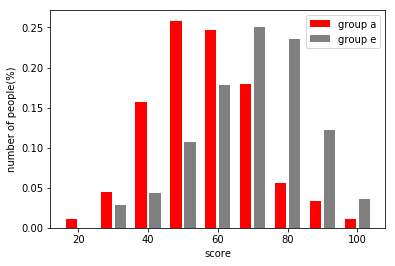

In [15]:
plt.bar(list(math_a_dis.index), list(math_a_dis), width=3.2, color='r', label='group a')
plt.bar(list(math_e_dis.index), list(math_e_dis), width=3.2, color='gray', label='group e')
plt.legend()
plt.xlabel('score')
plt.ylabel('number of people(%)')
plt.show()

# 不同種族間數學成績比較
group e > group d > group c > group b > group a

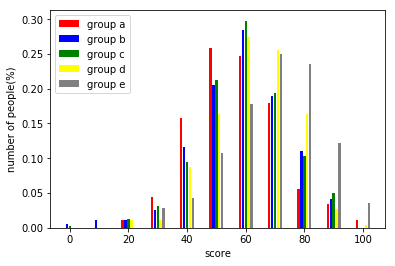

In [16]:
plt.bar(list(math_a_dis.index), list(math_a_dis), width=0.8, color='r', label='group a')
plt.bar(list(math_b_dis.index), list(math_b_dis), width=0.8, color='b', label='group b')
plt.bar(list(math_c_dis.index), list(math_c_dis), width=0.8, color='g', label='group c')
plt.bar(list(math_d_dis.index), list(math_d_dis), width=0.8, color='yellow', label='group d')
plt.bar(list(math_e_dis.index), list(math_e_dis), width=0.8, color='gray', label='group e')
plt.legend()
plt.xlabel('score')
plt.ylabel('number of people(%)')
plt.show()

# 不同種族間寫作成績比較
group e > group d > group c > group b > group a

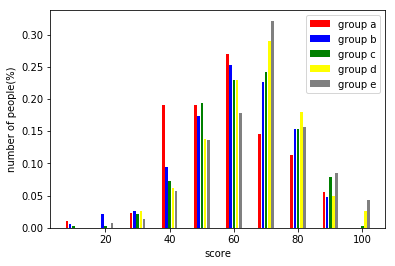

In [17]:
plt.bar(list(writing_a_dis.index), list(writing_a_dis), width=0.8, color='r', label='group a')
plt.bar(list(writing_b_dis.index), list(writing_b_dis), width=0.8, color='b', label='group b')
plt.bar(list(writing_c_dis.index), list(writing_c_dis), width=0.8, color='g', label='group c')
plt.bar(list(writing_d_dis.index), list(writing_d_dis), width=0.8, color='yellow', label='group d')
plt.bar(list(writing_e_dis.index), list(writing_e_dis), width=0.8, color='gray', label='group e')
plt.legend()
plt.xlabel('score')
plt.ylabel('number of people(%)')
plt.show()

In [18]:
# 不同種族間閱讀成績比較
group e > group d > group c > group b > group a

SyntaxError: invalid syntax (<ipython-input-18-f8b113b28155>, line 2)

In [ ]:
plt.bar(list(reading_a_dis.index), list(reading_a_dis), width=0.8, color='r', label='group a')
plt.bar(list(reading_b_dis.index), list(reading_b_dis), width=0.8, color='b', label='group b')
plt.bar(list(reading_c_dis.index), list(reading_c_dis), width=0.8, color='g', label='group c')
plt.bar(list(reading_d_dis.index), list(reading_d_dis), width=0.8, color='yellow', label='group d')
plt.bar(list(reading_e_dis.index), list(reading_e_dis), width=0.8, color='gray', label='group e')
plt.legend()
plt.xlabel('score')
plt.ylabel('number of people(%)')
plt.show()

# 父母教育程度的考試分佈
父母教育程度越高點的顏色越深

從下面分析可以看出，分數教高的部份顏色偏重，分數較低的部份顏色較輕，代表父母教育程度對學生分數有影響，且通常父母學歷越高，學生分數也會較高

In [ ]:
def color_map(num):
    if num == 0:
        return 'red'
    elif num == 1:
        return 'green'
    elif num == 2:
        return 'b'
    else:
        return 'y'
    
color_data = num_data.drop(['gender', 'race', 'education', 'lunch', 'course'], axis=1)
color_data['gender'] = num_data['gender'].apply(color_map)

color_data.plot.scatter(x='reading score', y='writing score', c=num_data['education']) 

# 利用decision tree 預測學生會不會及格
假設 
```
    1. >= 60 及格
    2. < 60 不及格
```

In [ ]:
# 將分數分成及格和不及格
def pass_map(score):
    if score >= 60:
        return 1
    else:
        return 0

num_data['math score'] = num_data['math score'].apply(pass_map)
num_data['writing score'] = num_data['writing score'].apply(pass_map)
num_data['reading score'] = num_data['reading score'].apply(pass_map)

In [ ]:
# 將資料分成 training data 和 validation data
x_data = num_data.drop(['math score', 'writing score', 'reading score'], axis=1)
y_data = num_data[['math score', 'writing score', 'reading score']]
x_train, x_val, y_train, y_val = train_test_split(x_data, y_data, random_state=0) # 每次分割都一樣

In [ ]:
# decision model
dt_math = DecisionTreeClassifier(max_depth=5)
dt_writing = DecisionTreeClassifier(max_depth=5)
dt_reading = DecisionTreeClassifier(max_depth=4)

# fit
dt_math.fit(x_data, y_data['math score'])
dt_writing.fit(x_data, y_data['writing score'])
dt_reading.fit(x_data, y_data['reading score'])

In [ ]:
# predict
predict_math = dt_math.predict(x_val)
predict_writing = dt_writing.predict(x_val)
predict_reading = dt_reading.predict(x_val)

In [ ]:
# accuracy
print("accuracy of predict math score: ")
print(accuracy_score(y_val['math score'], predict_math))
print("accuracy of predict writing score: ")
print(accuracy_score(y_val['writing score'], predict_writing))
print("accuracy of predict reading score: ")
print(accuracy_score(y_val['reading score'], predict_reading))